# Error Correction 

# 1.Bit-Flip-Code

# A.Error Correction for a complete bit flip

Figure(556.56x367.889)
Result: {'111': 1024}


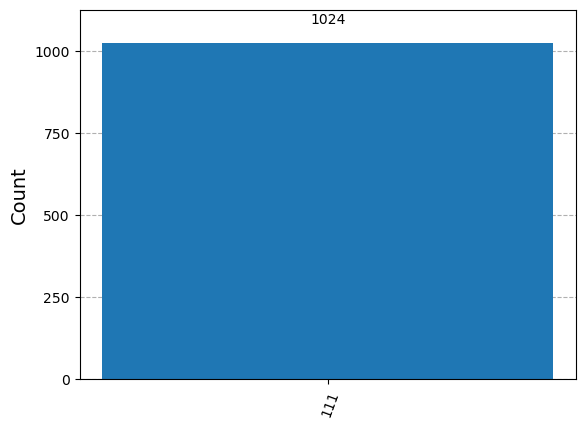

In [2]:
# importing the necessary libraries
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram
# Defining the number of qubits 
n = 3
qr = QuantumRegister(n)
cr = ClassicalRegister(n)
qc = QuantumCircuit(qr, cr)

# Applying NOT gate and assuming that the 2nd qubit has flip from |1> to |0> 
qc.x(0)
qc.x(1)

# Applying CCNOT gate
qc.ccx(0,1,2) 

# Measure the qubits
qc.measure(qr, cr)

# Draw the circuit
print(qc.draw('mpl'))

# Simulate the circuit
backend = Aer.get_backend('qasm_simulator')
job = backend.run(qc,shots=1024)
result = job.result()
counts = result.get_counts()

# Display the result
print("Result:", counts)
plot_histogram(counts)


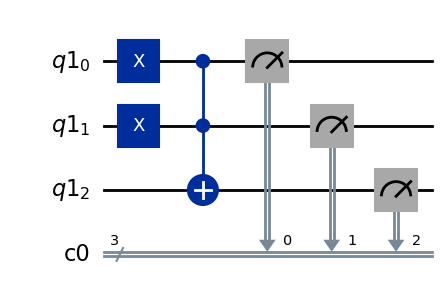

In [4]:
qc.draw('mpl')

Result: {'000': 1024}


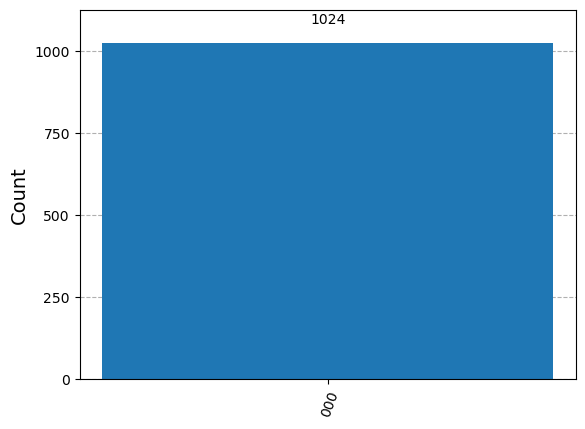

In [84]:
# importing the necessary libraries
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram

barriers = True

def bit_flip_code():
    # Create a quantum circuit with 6 qubits and 4 classical bits
    qr = QuantumRegister(6)
    cr = ClassicalRegister(3)
    qc = QuantumCircuit(qr, cr)

    if barriers:
        qc.barrier()

    # Introduce a bit flip error on any of the qubit (for demonstration)
    qc.x(qr[0]) # or apply qc.x(qr[0]) and qc.x(qr[2]) to obtain 111
    
    if barriers:
        qc.barrier()

    # Syndrome measurement
    qc.cx(qr[0], qr[3])
    qc.cx(qr[1], qr[3])
    qc.measure(qr[3], cr[0])
    qc.cx(qr[1], qr[4])
    qc.cx(qr[2], qr[4])
    qc.measure(qr[4], cr[1])

    if barriers:
        qc.barrier()

    # AND gate logic for combining conditions
    qc.ccx(qr[3], qr[4], qr[5])  # Use qubit 5 to store the AND result
    qc.measure(qr[5], cr[2])
    
    if barriers:
        qc.barrier()

    # Error correction using combined condition
    with qc.if_test((cr[2], 1)):
        qc.x(qr[1])
    with qc.if_test((cr[2], 0)):
        qc.x(qr[0])
    
    if barriers:
        qc.barrier()

    # Measure the logical qubit
    qc.measure(qr[0], cr[0])
    qc.measure(qr[1], cr[1])
    qc.measure(qr[2], cr[2])

    return qc
    
# Create and execute the bit flip error correction circuit
qc = bit_flip_code()
backend = Aer.get_backend('qasm_simulator')
job = backend.run(qc,shots=1024)
result = job.result()
counts = result.get_counts()

# Display the result
print("Result:", counts)
plot_histogram(counts)

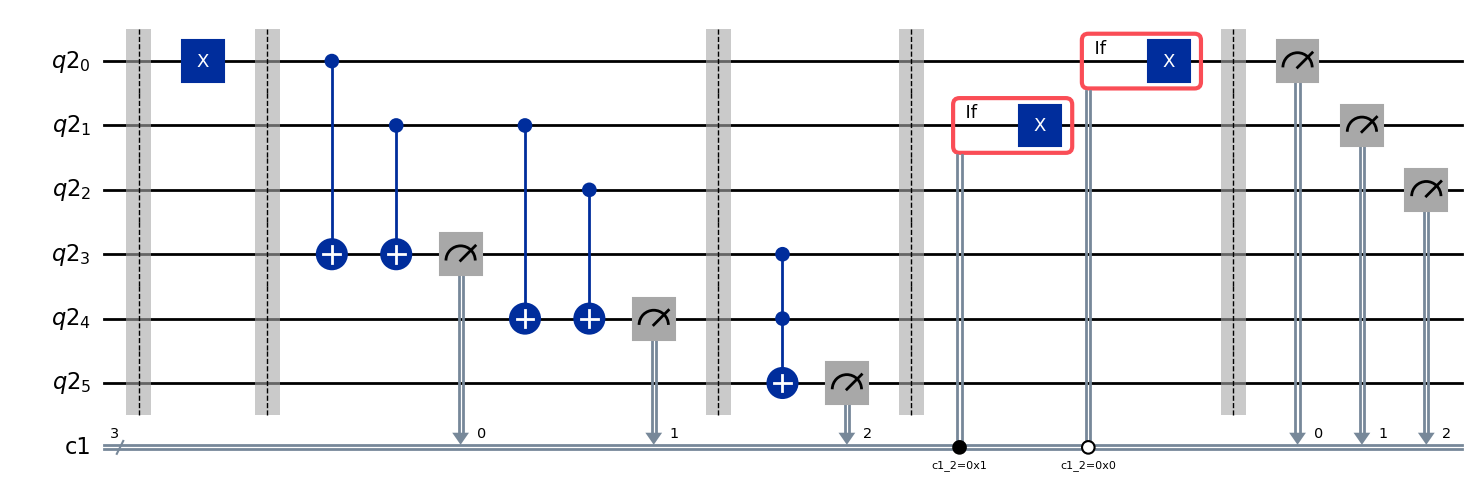

In [8]:
qc.draw('mpl')

# A simulation on Quirk

# see https://bit.ly/3EyuBMK

# B.Error Correction for a partial bit flip

Result: {'000': 973, '111': 51}


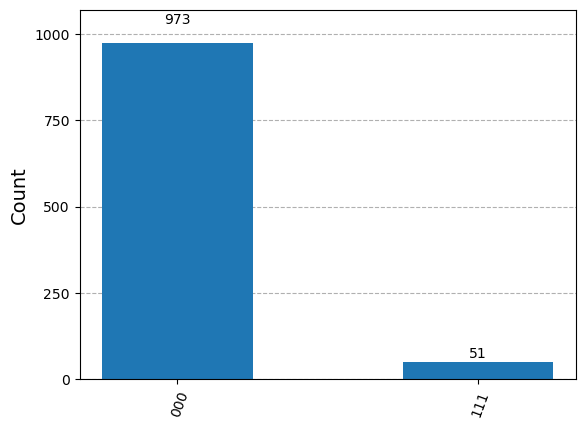

In [66]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram

# Step 1: Create quantum circuit and quantum Register
cr = ClassicalRegister(3) # 3 classical bits
qr = QuantumRegister(6)
qc = QuantumCircuit(qr, cr)  # 3 qubits + 3 ancilla, 3 classical bits

# Step 2: Encode logical qubit
qc.h(0)  # Superposition for logical qubit
qc.cx(0, 1)  # Copy to qubit 1
qc.cx(0, 2)  # Copy to qubit 2

# Step 3: Introduce a partial flip error
qc.rx(0.5, 1)  # Partial rotation (simulates partial flip)

# Step 4: Syndrome measurements using ancilla
qc.cx(0, 3)  # Bit-flip check
qc.cx(1, 3)
qc.measure(3, 0)
qc.cx(1, 4)
qc.cx(2, 4)
qc.measure(4, 1)
qc.ccx(3, 4, 5)
qc.measure(5, 2)  # Measure ancilla for bit-flip
qc.reset(5)  # Reset ancilla

# step 5: Error correction using combined condition
# Conditional X gates for bit-flip correction
with qc.if_test((cr[2], 1)):
    qc.x(qr[1])

# Apply Z gate conditionally if cr[2] == 0
with qc.if_test((cr[2], 0)):
    with qc.if_test((cr[0], 1)):  # Nested else condition
        qc.x(qr[0])  # Z gate on qr[0] if cr[0] == 1
    with qc.if_test((cr[0], 0)):  # Nested else condition
        qc.x(qr[2])  # Z gate on qr[2] if cr[0] == 0

# Simulate the circuit
backend = Aer.get_backend('qasm_simulator')
job = backend.run(qc,shots=1024)
result = job.result()
counts = result.get_counts()

# Display results
print("Result:", counts)
plot_histogram(counts)

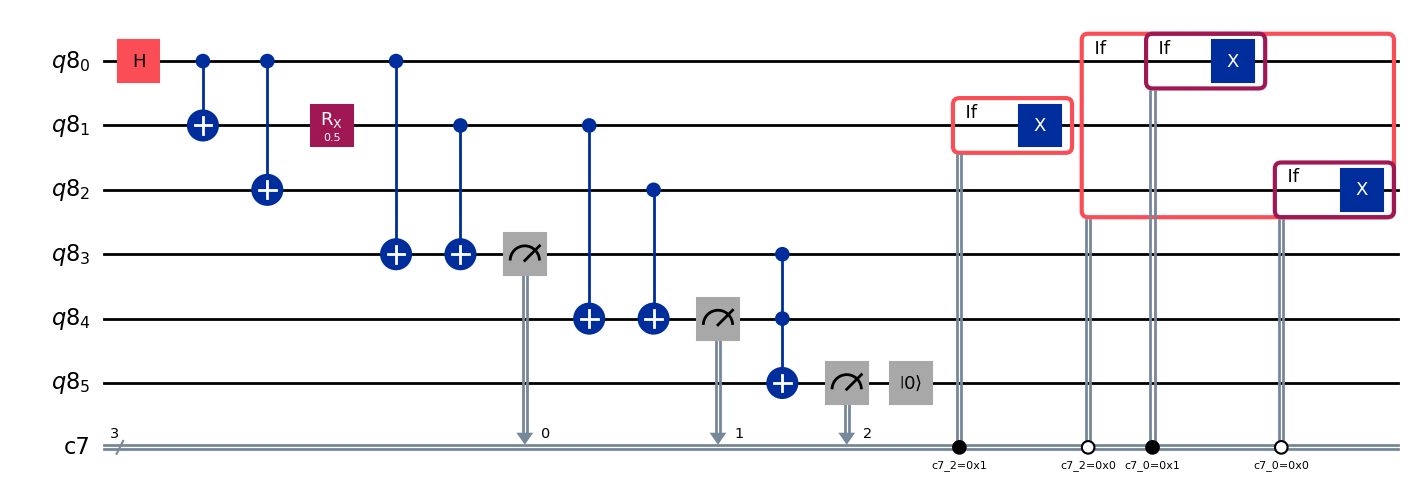

In [80]:
qc.draw('mpl')

# 2.Phase-Flip Code

Result: {'101': 396, '111': 395, '011': 384, '100': 384, '001': 370, '010': 387, '000': 378, '110': 378}


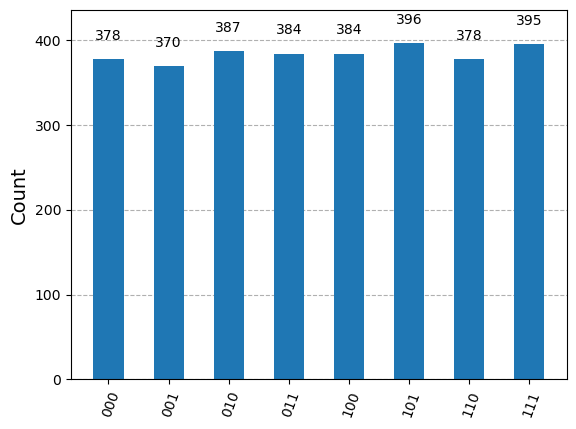

In [25]:
# importing the necessary libraries
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram

barriers = True

def bit_phase_code():
    # Create a quantum circuit with 6 qubits and 4 classical bits
    qr = QuantumRegister(6)
    cr = ClassicalRegister(3)
    qc = QuantumCircuit(qr, cr)

    if barriers:
        qc.barrier()

    # Introduce a bit flip error on any of the qubit (for demonstration)
    qc.x(qr[2]) # flipping the bit to |1> 

    if barriers:
        qc.barrier()
        
    #Applying Hadamard gate to the first 3 qubits 
    qc.h(qr[0])
    qc.h(qr[1])
    qc.h(qr[2])

    
    if barriers:
        qc.barrier()
        
    #Cancelling the effect of the phase
    qc.h(qr[0])
    qc.h(qr[1])
    qc.h(qr[2])
    
    if barriers:
        qc.barrier()

    # Syndrome measurement
    qc.cx(qr[0], qr[3])
    qc.cx(qr[1], qr[3])
    qc.measure(qr[3], cr[0])
    qc.cx(qr[1], qr[4])
    qc.cx(qr[2], qr[4])
    qc.measure(qr[4], cr[1])

    if barriers:
        qc.barrier()

    # AND gate logic for combining conditions
    qc.ccx(qr[3], qr[4], qr[5])  # Use qubit 5 to store the AND result
    qc.measure(qr[5], cr[2])

    if barriers:
        qc.barrier()
        
    # Applying Hadamard gate to the first 3 qubits
    qc.h(qr[0])
    qc.h(qr[1])
    qc.h(qr[2])
    
    if barriers:
        qc.barrier()
    
    # Error correction using combined condition
    # Apply Z gate to qr[1] if cr[2] == 1
    with qc.if_test((cr[2], 1)):
        qc.z(qr[1])

    # Apply Z gate conditionally if cr[2] == 0
    with qc.if_test((cr[2], 0)):
        with qc.if_test((cr[0], 1)): # Nested else condition
            qc.z(qr[0])  # Z gate on qr[0] if cr[0] == 1
        with qc.if_test((cr[0], 0)): # Nested else condition
            qc.z(qr[2])  # Z gate on qr[2] if cr[0] == 0


    if barriers:
        qc.barrier()

    # Measure the logical qubit
    qc.measure(qr[0], cr[0])
    qc.measure(qr[1], cr[1])
    qc.measure(qr[2], cr[2])
    
    return qc
    
# Create and execute the bit flip error correction circuit
qc = bit_phase_code()
backend = Aer.get_backend('qasm_simulator')
job = backend.run(qc,shots=3072)
result = job.result()
counts = result.get_counts()

# Display the result
print("Result:", counts)
plot_histogram(counts)

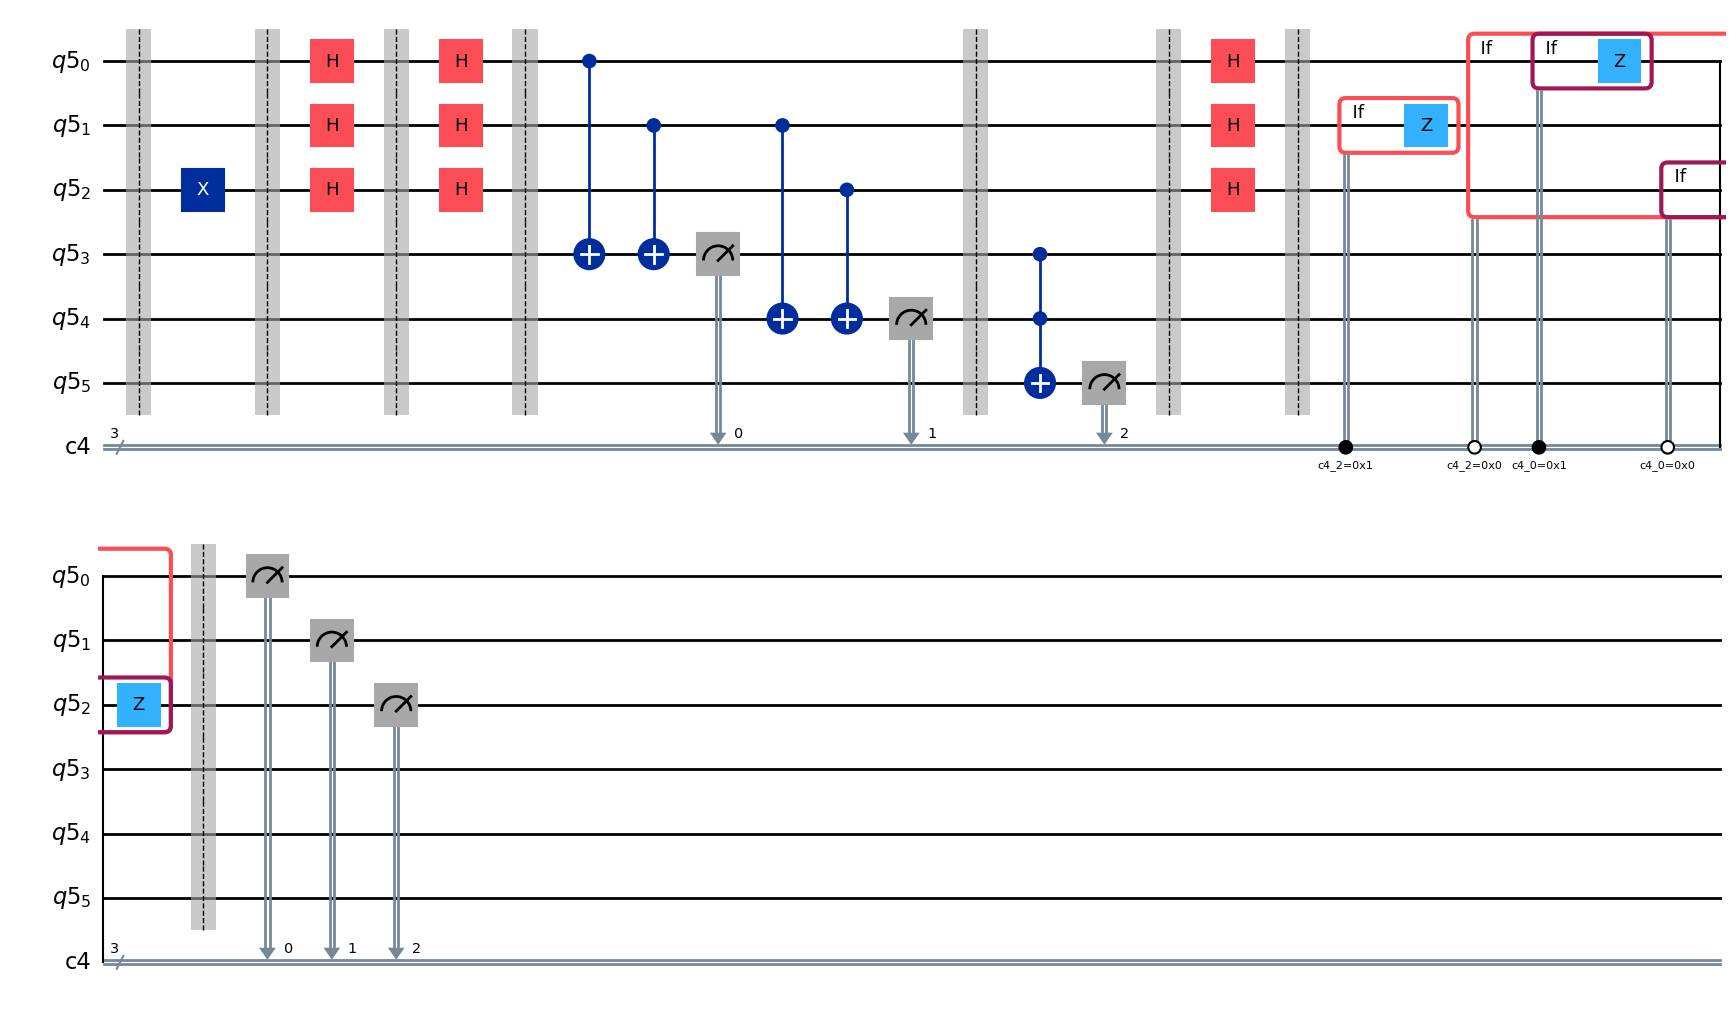

In [27]:
qc.draw('mpl')

 # Simulating this in Quirk https://bit.ly/3e7dNQR

# 3.Shor Code

Result: {'000000000': 2048}


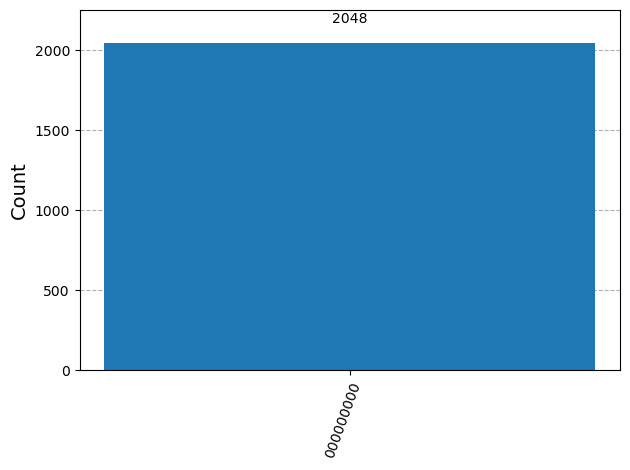

In [3]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram

# Step 1: Create quantum registers and circuit
qr = QuantumRegister(11)  # 9 physical qubits + 2 ancilla qubits
cr = ClassicalRegister(9)  # 9 classical bits for syndrome measurements
qc = QuantumCircuit(qr, cr)

barrier = True
if barrier:
    qc.barrier()
    
# Step 2: Encode logical qubits (Shor encoding)
# Bit-flip protection (3-qubit repetition)
qc.cx(0, 3)
qc.cx(0, 6)
qc.cx(1, 4)
qc.cx(1, 7)
qc.cx(2, 5)
qc.cx(2, 8)

if barrier:
    qc.barrier()

# Phase-flip protection (Hadamard then 3-qubit repetition)
qc.h(0)
qc.cx(0, 3)
qc.cx(0, 6)
qc.h([0, 3, 6])
qc.cx(0, 1)
qc.cx(0, 2)
qc.cx(3, 4)
qc.cx(3, 5)
qc.cx(6, 7)
qc.cx(6, 8)

if barrier:
    qc.barrier()
    
# Step 3: Introduce errors (simulating noise)
qc.ry(0.5,3)  # Example bit-flip error
qc.rz(0.5,0)  # Example phase-flip error
qc.x(1)
qc.z(2)

if barrier:
    qc.barrier()

# Step 4: Syndrome measurements with ancilla qubits
# Bit-flip detection using ancilla qubit 9 and 10, For the first 3 qubits 
qc.cx(0, 9)
qc.cx(1, 9)
qc.measure(9, cr[0]) 
qc.reset(9)
qc.cx(1, 10)
qc.cx(2, 10)
qc.measure(10, cr[1])  # Measure syndrome for bit-flip error
qc.reset(10)

# Correcting bit-flip errors for the first 3 qubits
with qc.if_test((cr[0], 1)):
    with qc.if_test((cr[1], 0)):  
        qc.x(qr[0])
        
with qc.if_test((cr[0], 1)):
    with qc.if_test((cr[1], 1)):  
        qc.x(qr[1])
        
with qc.if_test((cr[0], 0)):
    with qc.if_test((cr[1], 1)):  
        qc.x(qr[2])        

if barrier:
    qc.barrier()

# Bit-flip detection using ancilla qubit 9 and 10, For the next 3 qubits
qc.cx(3, 9)
qc.cx(4, 9)
qc.measure(9, cr[2])
qc.reset(9)
qc.cx(4, 10)
qc.cx(5, 10)  
qc.measure(10, cr[3])  # Measure syndrome for bit-flip error
qc.reset(10)

# Correcting bit-flip errors for the next 3 qubits
with qc.if_test((cr[2], 1)):
    with qc.if_test((cr[3], 0)):  
        qc.x(qr[3])
        
with qc.if_test((cr[2], 1)):
    with qc.if_test((cr[3], 1)):  
        qc.x(qr[4])
        
with qc.if_test((cr[2], 0)):
    with qc.if_test((cr[3], 1)):  
        qc.x(qr[5])        

if barrier:
    qc.barrier()

# Bit-flip detection using ancilla qubit 9 and 10, For the last 3 qubits
qc.cx(6, 9)
qc.cx(7, 9)
qc.measure(9, cr[4])
qc.reset(9)
qc.cx(7, 10)
qc.cx(8, 10) 
qc.measure(10, cr[5])  # Measure syndrome for bit-flip error
qc.reset(10)

# Correcting bit-flip errors for the last 3 qubits
with qc.if_test((cr[4], 1)):
    with qc.if_test((cr[5], 0)):  
        qc.x(qr[6])
        
with qc.if_test((cr[4], 1)):
    with qc.if_test((cr[5], 1)):  
        qc.x(qr[7])
        
with qc.if_test((cr[4], 0)):
    with qc.if_test((cr[5], 1)):  
        qc.x(qr[8])        

if barrier:
    qc.barrier()

qc.cx(0, 1)
qc.cx(0, 2)
qc.cx(3, 4)
qc.cx(3, 5)
qc.cx(6, 7)
qc.cx(6, 8)
qc.h([0,3,6])
qc.cx(0, 3)
qc.cx(0, 6)
qc.h(0)

if barrier:
    qc.barrier()
    
qc.h(0)
qc.cx(0, 3)
qc.cx(0, 6)
qc.h([0, 3, 6])
        
if barrier:
    qc.barrier()

#Step 5:Phase-flip detection using ancilla qubits
qc.h([0, 3, 6])  # Switching to Z-basis
qc.cx(0, 9)
qc.cx(3, 9)
qc.measure(9, cr[6])
qc.reset(9)
qc.cx(3, 10)
qc.cx(6, 10)
qc.h([0, 3, 6])  # Returning to original basis
qc.measure(10, cr[7])  # Measure syndrome for phase-flip error
qc.reset(10)

# Correct phase-flip errors
with qc.if_test((cr[6], 1)):
    with qc.if_test((cr[7], 0)):  
        qc.z(qr[0])
        
with qc.if_test((cr[6], 1)):
    with qc.if_test((cr[7], 1)):  
        qc.z(qr[3])
        
with qc.if_test((cr[6], 0)):
    with qc.if_test((cr[7], 1)):  
        qc.z(qr[6])

if barrier:
    qc.barrier()

qc.h([0, 3, 6])
qc.cx(0, 3)
qc.cx(0, 6)
qc.h(0)

if barrier:
    qc.barrier()
    
# Step 6: Final measurements for validation
qc.measure([0,1,2,3,4,5,6,7,8], [0,1,2,3,4,5,6,7,8]) # Measure logical qubits

# Step 7: Simulate the circuit
backend = Aer.get_backend('qasm_simulator')
job = backend.run(qc, shots=2048)
result = job.result()
counts = result.get_counts()

# Display results
print("Result:", counts)
plot_histogram(counts)

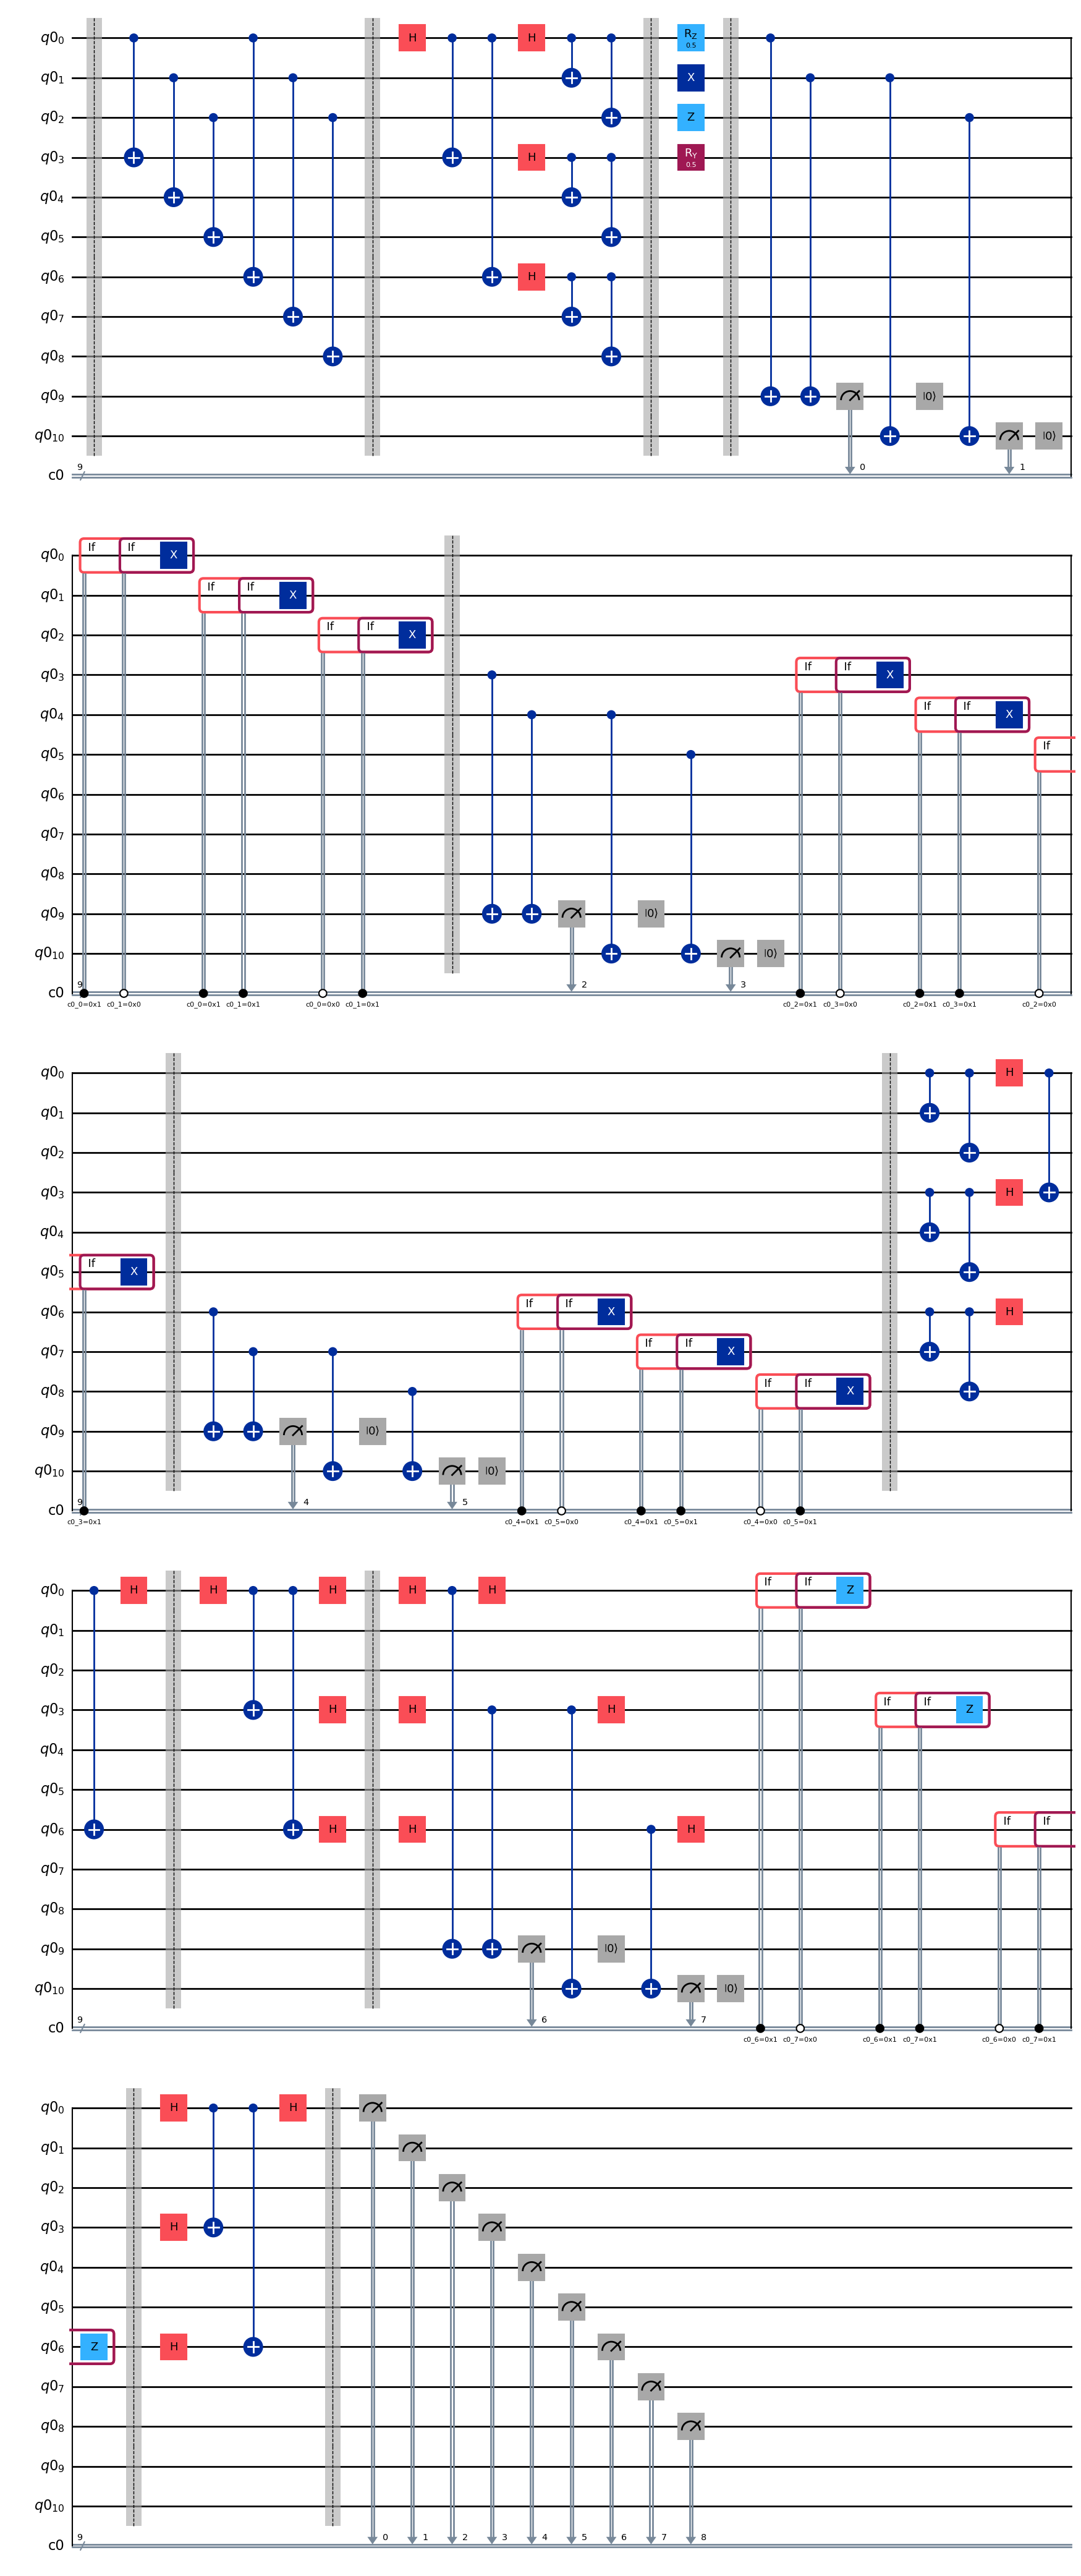

In [7]:
qc.draw('mpl')